In [ ]:

df_iqr.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr-v1.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_001-v1.csv', index=False)

In [ ]:

df_iqr_remain.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr_remain-v1.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
abnormal = pd.read_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr-v1.csv') #, encoding = 'cp949')

In [ ]:
import pandas as pd
import numpy as np
normal = pd.read_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr_remain-v1.csv') #, encoding = 'cp949')

In [ ]:
normal

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
0,75.6648,30.0155,100.000486,100.01548,0
1,75.6706,32.2732,100.000486,100.01548,0
2,75.6776,32.1592,98.853300,99.14600,0
3,75.8656,30.8312,98.791800,99.17675,0
4,73.6468,29.5274,98.791800,99.20750,0
...,...,...,...,...,...
332238,67.5951,24.5822,100.555000,99.31990,0
332239,69.7477,24.6776,100.681000,99.32550,0
332240,69.6538,24.5689,100.681000,99.32550,0
332241,69.6970,24.6643,100.681000,99.32550,0


In [ ]:
normal['설비 이상신호'] = 0

abnormal['설비 이상신호'] = 1

In [ ]:
from sklearn.model_selection import train_test_split
train_Y, test_Y = train_test_split(normal, test_size =0.3, random_state =1)
print('학습 데이터셋 개수:', len(train_Y))
print('테스트 데이터셋 개수:', len(test_Y))

학습 데이터셋 개수: 232570
테스트 데이터셋 개수: 99673


In [ ]:
train_Y

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
320329,71.6486,24.2349,99.9814,100.0560,0
252742,74.8703,23.3284,100.0040,99.9627,0
84054,69.4963,20.0641,100.0780,100.0680,0
160224,69.9548,19.9671,100.3030,100.2620,0
273206,74.9906,24.4483,100.1650,99.8549,0
...,...,...,...,...,...
117583,71.5045,20.3600,100.3760,100.3940,0
73349,72.5537,23.0418,99.7762,100.0280,0
312201,70.8171,21.3326,100.1110,100.1110,0
267336,72.5840,25.8935,100.2270,99.8681,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 스케일링
scaler = MinMaxScaler()
# 정상 학습데이터 스케일링
normal_train_scaled = scaler.fit_transform(train_Y.iloc[:,:-1])
X_normal_train = pd.DataFrame(data=normal_train_scaled, index=train_Y.iloc[:,:-1].index,
                              columns=train_Y.iloc[:,:-1].columns)
# 정상 학습데이터 y 값 설정
y_normal_train = train_Y.iloc[:,-1]
# 최종 정상 학습데이터
train_Y_normal = pd.concat([X_normal_train, y_normal_train], axis=1)
# 정상 테스트데이터 스케일링
normal_test_scaled = scaler.transform(test_Y.iloc[:,:-1])
X_normal_test = pd.DataFrame(data=normal_test_scaled, index=test_Y.iloc[:,:-1].index,
                             columns=test_Y.iloc[:,:-1].columns)
# 정상 테스트데이터 y 값 설정
y_normal_test = test_Y.iloc[:,-1]
# 최종 정상 테스트데이터
test_Y_normal = pd.concat([X_normal_test, y_normal_test], axis=1)
# 비정상 테스트 데이터 스케일링
abnormal_test_scaled = scaler.transform(abnormal.iloc[:, :-1])
X_abnormal_test = pd.DataFrame(data=abnormal_test_scaled,
          index=abnormal.iloc[:, :-1].index,columns=abnormal.iloc[:, :-1].columns)
# y 값 설정
y_abnormal_test = abnormal.iloc[:,-1]
# 최종 비정상 테스트데이터
abnormal_data = pd.concat([X_abnormal_test, y_abnormal_test], axis=1)

In [ ]:
X_abnormal_test


,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
0,-0.177635,0.676967,0.731076,0.341111
1,-0.006921,0.497636,0.854484,0.686520
2,-0.090098,0.696041,0.747307,0.319394
3,-0.067150,0.692723,0.747307,0.319394
4,-0.057459,0.608704,0.748146,0.341111
...,...,...,...,...
13142,-0.106205,0.650242,0.731076,0.321204
13143,-0.088123,0.651871,0.716245,0.323595
13144,-0.062493,0.653341,0.733595,0.323595
13145,-0.049847,0.654674,0.716245,0.323595


In [ ]:
import os
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score

# 모델 저장 경로
model_path_template = r'/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/xgboost_model-epoch-{epoch:02d}.pkl'

# 사용자 정의 콜백 클래스 (XGBoost에 맞게 수정)
class SaveModelEveryNEpochs:
    def __init__(self, model, save_path, frequency):
        self.model = model
        self.save_path = save_path
        self.frequency = frequency
        self.epoch = 0

    def __call__(self, epoch, evals_result):
        self.epoch = epoch
        if (self.epoch + 1) % self.frequency == 0:
            save_path_with_epoch = self.save_path.format(epoch=self.epoch + 1)
            joblib.dump(self.model, save_path_with_epoch)  # XGBoost 모델 저장
            print(f"\nModel saved at {save_path_with_epoch}")

# 데이터 준비 (X_normal_train, y_normal_train, X_normal_test, y_normal_test는 이미 준비된 데이터라고 가정)
# 예시로 train, test 데이터를 나누어 줍니다
X_train, X_test, y_train, y_test = train_test_split(X_normal_train, y_normal_train, test_size=0.2, random_state=42)

# XGBoost 모델 학습 파라미터 설정
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'scale_pos_weight': 1
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(**params)

# 사용자 정의 콜백 추가
save_model_callback = SaveModelEveryNEpochs(model=model, save_path=model_path_template, frequency=20)

# 모델 학습 (X_train과 y_train을 사용)
history = model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # 평가 데이터셋
    early_stopping_rounds=10,  # early stopping
    verbose=10  # 10번마다 학습 상태 출력
)

# 최종 모델 저장
joblib.dump(model, '/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/xgboost_final_model.pkl')

# 예측 및 평가
y_pred = model.predict(X_test)

# Precision, Recall, F1 Score 계산
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.utils import resample

# 데이터 샘플링 (전체 데이터가 너무 크면 일부만 사용)
X_normal_train_sampled = resample(X_normal_train, n_samples=5000, random_state=42)  # 5000개 샘플로 제한
X_abnormal_test_sampled = resample(X_abnormal_test, n_samples=5000, random_state=42)  # 5000개 샘플로 제한

# DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.3, min_samples=10, n_jobs=-1)  # n_jobs=-1로 병렬 처리, eps와 min_samples 조정
dbscan.fit(X_normal_train_sampled)  # 정상 데이터로 학습

# DBSCAN은 라벨로 -1 (이상치) 값을 사용합니다.
y_normal_pred = dbscan.labels_  # 학습된 정상 데이터에 대한 라벨 예측

# 비정상 테스트 데이터 예측
test_abnormal_pred = dbscan.fit_predict(X_abnormal_test_sampled.values)  # 비정상 데이터 예측

# 정상 데이터와 비정상 데이터에 대한 라벨 비교
y_true = np.concatenate([np.zeros(len(y_normal_pred)), np.ones(len(test_abnormal_pred))])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([y_normal_pred, test_abnormal_pred])  # 예측된 라벨

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Precision (정밀도): 1.0
Recall (재현율): 0.1432
F1 Score: 0.25052484254723584

Classification Report:
              precision    recall  f1-score   support

          정상       0.54      1.00      0.70      5000
         비정상       1.00      0.14      0.25      5000

    accuracy                           0.57     10000
   macro avg       0.77      0.57      0.48     10000
weighted avg       0.77      0.57      0.48     10000


Confusion Matrix:
[[5000    0]
 [4284  716]]


dbscan 종료

Robust Covariance Estimation 시작


Precision (정밀도): 0.6954103770702194
Recall (재현율): 0.86552065109911
F1 Score: 0.7711962046763808

Classification Report:
              precision    recall  f1-score   support

          정상       0.98      0.95      0.97     99673
         비정상       0.70      0.87      0.77     13147

    accuracy                           0.94    112820
   macro avg       0.84      0.91      0.87    112820
weighted avg       0.95      0.94      0.94    112820


Confusion Matrix:
[[94689  4984]
 [ 1768 11379]]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


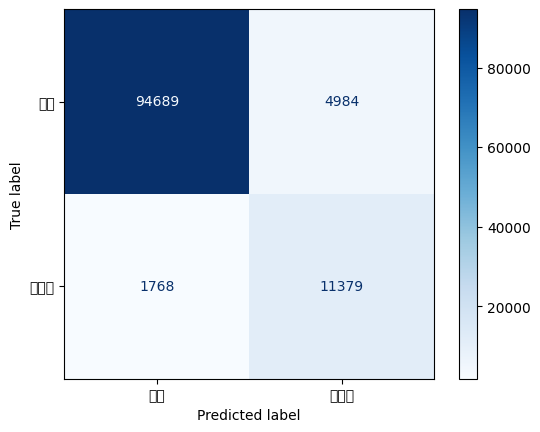

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Robust Covariance Estimation 모델 학습
model = EllipticEnvelope(contamination=0.1)  # contamination: 이상치 비율
model.fit(X_normal_train.values)  # 정상 데이터로 모델 학습

# 정상 테스트 데이터에 대한 이상치 점수 계산
test_normal_scores = model.decision_function(X_normal_test.values)
# 비정상 테스트 데이터에 대한 이상치 점수 계산
test_abnormal_scores = model.decision_function(X_abnormal_test.values)

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(test_normal_scores, 5)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_scores))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_scores))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_scores < threshold).astype(int),  # 정상 데이터 예측 (Threshold 미만일 경우 이상치로 간주)
    (test_abnormal_scores < threshold).astype(int)  # 비정상 데이터 예측 (Threshold 미만일 경우 이상치로 간주)
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["정상", "비정상"])
disp.plot(cmap="Blues")
plt.show()


22. Minimum Covariance Determinant (MCD)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.covariance import MinCovDet

# Minimum Covariance Determinant (MCD) 모델 학습
# model = MinCovDet(contamination=0.1)  # contamination: 이상치 비율
model = MinCovDet(support_fraction=0.9)  # support_fraction: 정상 데이터 비율 (1-지원되는 비율)

model.fit(X_normal_train.values)  # 정상 데이터로 모델 학습

# 정상 테스트 데이터에 대한 이상치 점수 계산
test_normal_scores = model.mahalanobis(X_normal_test.values)  # Mahalanobis 거리 계산
# 비정상 테스트 데이터에 대한 이상치 점수 계산
test_abnormal_scores = model.mahalanobis(X_abnormal_test.values)  # Mahalanobis 거리 계산

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(test_normal_scores, 95)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_scores))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_scores))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_scores > threshold).astype(int),  # 정상 데이터 예측 (Threshold 초과 시 1)
    (test_abnormal_scores > threshold).astype(int)  # 비정상 데이터 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Precision (정밀도): 0.6958750305101293
Recall (재현율): 0.8674222256027991
F1 Score: 0.7722363297782292

Classification Report:
              precision    recall  f1-score   support

          정상       0.98      0.95      0.97     99673
         비정상       0.70      0.87      0.77     13147

    accuracy                           0.94    112820
   macro avg       0.84      0.91      0.87    112820
weighted avg       0.95      0.94      0.94    112820


Confusion Matrix:
[[94689  4984]
 [ 1743 11404]]


Minimum Covariance Determinant (MCD) 종료

Ensemble Anomaly Detection
IsolationForest, LocalOutlierFactor, OneClassSVM 3개 모델 결합

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# 개별 모델 학습
iso_forest = IsolationForest(random_state=42, contamination=0.1)
lof = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma="auto")

# 모델 훈련
iso_forest.fit(X_normal_train.values)  # Isolation Forest
lof.fit(X_normal_train.values)         # Local Outlier Factor
ocsvm.fit(X_normal_train.values)       # One-Class SVM

# 예측 값 계산
iso_forest_pred = iso_forest.predict(X_normal_test.values)
lof_pred = lof.predict(X_normal_test.values)
ocsvm_pred = ocsvm.predict(X_normal_test.values)

# 예측 결과가 -1이면 이상치(1), 1이면 정상(0)으로 변환
iso_forest_pred = np.where(iso_forest_pred == -1, 1, 0)
lof_pred = np.where(lof_pred == -1, 1, 0)
ocsvm_pred = np.where(ocsvm_pred == -1, 1, 0)

# 앙상블 모델의 예측 결과 결합
# 다수결 방식으로 앙상블 예측
ensemble_pred = np.round((iso_forest_pred + lof_pred + ocsvm_pred) / 3)

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(ensemble_pred))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(ensemble_pred))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([ensemble_pred, ensemble_pred])  # 예측된 라벨

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Precision (정밀도): 0.5
Recall (재현율): 0.09010464217992836
F1 Score: 0.15269265099672716

Classification Report:
              precision    recall  f1-score   support

          정상       0.50      0.91      0.65     99673
         비정상       0.50      0.09      0.15     99673

    accuracy                           0.50    199346
   macro avg       0.50      0.50      0.40    199346
weighted avg       0.50      0.50      0.40    199346


Confusion Matrix:
[[90692  8981]
 [90692  8981]]


deep SVDD모델

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import Callback, EarlyStopping

# SaveModelEveryNEpochs 콜백 정의 (주기적으로 모델 저장)
class SaveModelEveryNEpochs(Callback):
    def __init__(self, save_path, frequency):
        super().__init__()
        self.save_path = save_path
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.frequency == 0:  # 20회마다 저장
            save_path_with_epoch = self.save_path.format(epoch=epoch + 1)
            self.model.save(save_path_with_epoch)
            print(f"\nModel saved at {save_path_with_epoch}")

# Deep SVDD 모델 구현 (Autoencoder 구조 없이)
def build_deep_svdd_model(input_dim):
    model = models.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(2, activation='linear'),  # Latent space (no reconstruction)
        layers.Dense(4, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(input_dim, activation='sigmoid')  # 마지막 레이어는 이상치 탐지의 기준으로 사용
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 모델 저장 경로
model_path_template = r'/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/deepsvdd-epoch-{epoch:02d}.keras'

# 사용자 정의 콜백 추가
save_model_callback = SaveModelEveryNEpochs(save_path=model_path_template, frequency=20)

# 모델 학습 (정상 데이터로만 학습)
input_dim = X_normal_train.shape[1]  # 입력 데이터 차원
deep_svdd_model = build_deep_svdd_model(input_dim)

# 학습 시작
history = deep_svdd_model.fit(
    X_normal_train, X_normal_train,  # Deep SVDD는 정상 데이터로만 학습
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10, mode="min"),
        save_model_callback  # 주기적으로 모델을 저장하는 콜백
    ]
)

# 최종 모델 저장
deep_svdd_model.save('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/deepsvdd-final-model.keras')

# 모델 학습 기록 출력 (optional)
print(history.history)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 2/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 12

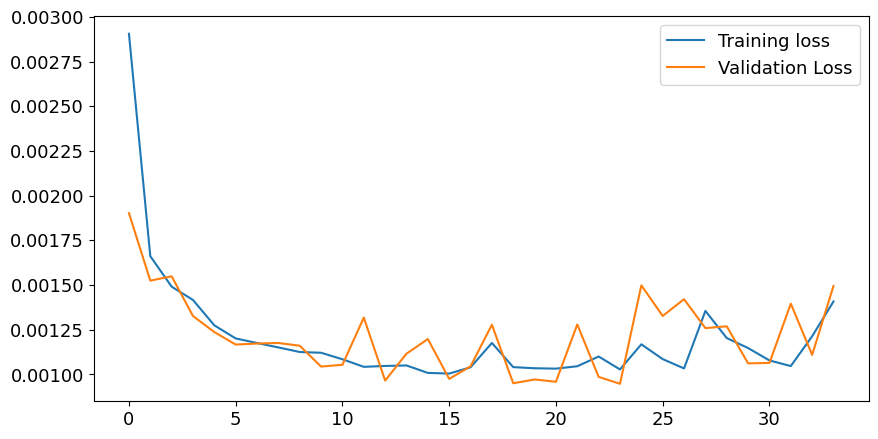

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] =13
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.summary()


AttributeError: 'MinCovDet' object has no attribute 'summary'

In [ ]:
x_train_pred = model.predict(X_normal_train)
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train), axis=1)




AttributeError: 'MinCovDet' object has no attribute 'predict'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt

# 모델 학습 (정상 데이터로만 학습)
# min_cov_det = MinCovDet()
# min_cov_det.fit(X_normal_train)  # 정상 데이터로 학습

# 정상 테스트 데이터에 대한 Mahalanobis 거리 계산
# mahalanobis_normal = min_cov_det.mahalanobis(X_normal_test)
# # 비정상 테스트 데이터에 대한 Mahalanobis 거리 계산
# mahalanobis_abnormal = min_cov_det.mahalanobis(X_abnormal_test)

# 정상 테스트 데이터에 대한 Mahalanobis 거리 계산
mahalanobis_normal = model.mahalanobis(X_normal_test)
# 비정상 테스트 데이터에 대한 Mahalanobis 거리 계산
mahalanobis_abnormal = model.mahalanobis(X_abnormal_test)

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(mahalanobis_normal, 95)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(mahalanobis_normal))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(mahalanobis_abnormal))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (mahalanobis_normal > threshold).astype(int),  # 정상 데이터 예측 (Threshold 초과 시 1)
    (mahalanobis_abnormal > threshold).astype(int)  # 비정상 데이터 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinCovDet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinCovDet was fitted without feature names
  warnings.warn(


Precision (정밀도): 0.6958750305101293
Recall (재현율): 0.8674222256027991
F1 Score: 0.7722363297782292

Classification Report:
              precision    recall  f1-score   support

          정상       0.98      0.95      0.97     99673
         비정상       0.70      0.87      0.77     13147

    accuracy                           0.94    112820
   macro avg       0.84      0.91      0.87    112820
weighted avg       0.95      0.94      0.94    112820


Confusion Matrix:
[[94689  4984]
 [ 1743 11404]]


Deep SVDD와 MinCovDet는 사실 연관성이 있습니다. MinCovDet는 Deep SVDD 모델의 학습 과정에서 정상 데이터 분포의 특성을 파악하고 이상치를 탐지하는 데 유용한 기법으로 사용될 수 있습니다. 구체적으로, Deep SVDD의 목적은 정상 데이터의 분포를 모델링하고 이상치를 탐지하는 것인데, MinCovDet가 강건한 공분산 추정을 통해 정상 데이터의 분포를 잘 모델링할 수 있기 때문에, 이를 Deep SVDD 모델의 일부로 사용할 수 있습니다.

Deep SVDD와 MinCovDet의 관계
Deep SVDD는 딥러닝 모델을 사용하여 정상 데이터의 분포를 학습하고, 이 데이터를 **잠재 공간 (latent space)**으로 압축하여 그 공간 내에서 정상 데이터의 특징을 파악하고 이상치를 탐지합니다. 이때 MinCovDet는 정상 데이터의 공분산 구조를 학습하여 정상 데이터의 분포를 더욱 정확하게 이해할 수 있도록 도와주는 도구로 사용될 수 있습니다.

Deep SVDD에서 MinCovDet 사용 이유:
공분산 추정:

Deep SVDD에서 정상 데이터의 분포를 잘 모델링하려면, 정상 데이터의 공분산을 잘 추정해야 합니다. MinCovDet는 강건한 공분산 추정 방법으로, 데이터의 이상치에 민감하지 않게 공분산을 추정할 수 있습니다. 이 공분산 추정이 Deep SVDD 모델이 학습하는 잠재 공간의 구체화에 중요한 역할을 합니다.
정상 데이터 분포 이해:

Deep SVDD의 목표는 정상 데이터의 분포를 학습하여 이를 기준으로 이상치를 탐지하는 것입니다. MinCovDet는 정상 데이터의 분포를 잘 모델링할 수 있어 Deep SVDD 모델의 학습에 유용합니다.
이상치 탐지:

MinCovDet의 Mahalanobis 거리를 사용하면 정상 데이터의 분포에서 벗어난 이상치를 효과적으로 탐지할 수 있습니다. Deep SVDD의 잠재 공간에서 데이터 포인트가 정상 데이터 분포와 얼마나 벗어난 것인지를 판단하는 데 MinCovDet의 공분산 추정이 사용될 수 있습니다.
결론:
Deep SVDD는 딥러닝 기반 모델로, 정상 데이터의 분포를 모델링하고 이상치를 탐지하는 데 중점을 두고 있습니다. MinCovDet는 강건한 공분산 추정 기법으로, 정상 데이터 분포를 모델링하는 데 도움을 줄 수 있으며, 이를 통해 Deep SVDD 모델이 정상 데이터를 더욱 정확하게 학습할 수 있습니다.
따라서, Deep SVDD 모델을 학습할 때 MinCovDet를 사용하는 이유는 정상 데이터의 공분산 구조를 정확하게 파악하고, 이상치를 보다 잘 탐지하기 위해입니다.